In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
%cd /content/drive/MyDrive


/content/drive/MyDrive


In [1]:
import csv
from itertools import groupby
import itertools
import numpy as np

def process_data(data):
    """sort by word pairs ids and then remove ids"""
    data = sorted(data, key=lambda i: int(i[0]))
    data = [row[1:] for row in data]
    data = [row[:-1]+[float(row[-1])] for row in data]
    return data

def read_file(file_name):
    """Read a csv file as a list and sort it"""
    with open(file_name) as f:
        reader = csv.reader(f)
        data = list(reader)
    data = process_data(data)
    return data


def calculate_accuracy(pred_f_name, gold_f_name):
  gold_standards = read_file(gold_f_name)
  predictions = read_file(pred_f_name)
  # Attach text word pairs to prediction similarity scores
  predictions = [[gold_standards[i][0],gold_standards[i][1], predictions[i][0]] for i in range(len(gold_standards))]

  # Group words pairs that have common words
  gold_std_grouped = [list(it) for k, it in groupby(gold_standards, lambda p:p[0])]
  pred_grouped = [list(it) for k, it in groupby(predictions, lambda p:p[0])]

  print('The following simalarity scores may need checking:')
  total = 0
  wrong_hits = 0
  for idx in range(len(gold_std_grouped)):
      preds = pred_grouped[idx]
      gold_std = gold_std_grouped[idx]
      # Get all possible permutations between word pairs that have common words
      pred_pairs_ = list(itertools.combinations(preds, 2))
      gold_pairs_ = list(itertools.combinations(gold_std, 2))
      # Get the relative order of word pairs' similarity scores in each permutation
      pred_pairs = map(lambda x:1 if x[0][2]-x[1][2] > 0 else 0, pred_pairs_)
      gold_pairs = map(lambda x:1 if x[0][2]-x[1][2] > 0 else 0, gold_pairs_)
      # Check if your prediction gives the same relative order as the gold standard
      out_arr = np.subtract(np.array(list(pred_pairs)), np.array(list(gold_pairs)))
      total+=len(out_arr)
      incorr = np.nonzero(out_arr)
      wrong_hits += len(incorr[0])
      for item in incorr[0]:
          print("({},{}) similarity score: {}, gold ranking: {}".format(pred_pairs_[item][0][0], pred_pairs_[item][0][1], pred_pairs_[item][0][2], gold_pairs_[item][0][2]))
          print("({},{}) similarity score: {}, gold ranking: {}".format(pred_pairs_[item][1][0], pred_pairs_[item][1][1], pred_pairs_[item][1][2], gold_pairs_[item][1][2]))
          print("----------------------------")

  # Accuracy = hit/total number of permutations
  # We consider a hit as the predicted similarity scores' relative order between two pairs is the same as gold ranking
  print("Accuracy: {}".format(1-wrong_hits/total))

  return 1-wrong_hits/total

# Evaluation Script Task 1
- Imported here to be used in training
- Altered to aid training

# Import datasets

### Import training dataset

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

file_path = "./data/Training-dataset.csv"
df = pd.read_csv(file_path, encoding='utf-8')
df

,ID,title,plot_synopsis,comedy,cult,flashback,historical,murder,revenge,romantic,scifi,violence
0,8f5203de-b2f8-4c0c-b0c1-835ba92422e9,Si wang ta,"After a recent amount of challenges, Billy Lo ...",0,0,0,0,1,1,0,0,1
1,6416fe15-6f8a-41d4-8a78-3e8f120781c7,Shattered Vengeance,"In the crime-ridden city of Tremont, renowned ...",0,0,0,0,1,1,1,0,1
2,4979fe9a-0518-41cc-b85f-f364c91053ca,L'esorciccio,Lankester Merrin is a veteran Catholic priest ...,0,1,0,0,0,0,0,0,0
3,b672850b-a1d9-44ed-9cff-025ee8b61e6f,Serendipity Through Seasons,"""Serendipity Through Seasons"" is a heartwarmin...",0,0,0,0,0,0,1,0,0
4,b4d8e8cc-a53e-48f8-be6a-6432b928a56d,The Liability,"Young and naive 19-year-old slacker, Adam (Jac...",0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8252,bc66257b-19bf-4ba2-b287-77b54ee0a205,I Went Down,After serving an eight month sentence for brea...,0,0,1,0,1,1,0,0,0
8253,9f8abad3-5a67-4fb1-a6d2-9fdff2d6c6f8,Scooby-Doo! Stage Fright,The Mystery Inc. crew head to Chicago for a ta...,0,0,1,0,0,0,0,0,0
8254,23837cc8-1503-4265-b793-bf60306d1a5c,Another Life,"Through its run, Another Life revolved around ...",0,1,1,0,0,0,1,0,1
8255,30a2f2c2-64c8-4d29-a7c4-ae1c14eb51b0,The Ward,At the North Bend Psychiatric Hospital in 1966...,0,0,1,0,0,0,0,0,0


### Import development dataset

In [21]:
# Load the gold standard data from the external file
gold_standard_data = pd.read_csv("data/Task-1-validation-dataset.csv", header=None)

# Extract relevant columns
validation_set = list(zip(gold_standard_data.iloc[:, 1], gold_standard_data.iloc[:, 2]))
gold_standard_scores = gold_standard_data.iloc[:, 3].tolist()


## Import test dataset

In [84]:
# Load the gold standard data from the external file
test_gold_standard_data = pd.read_csv("data/Task-1-test-dataset.csv", header=None)

# Extract relevant columns
test_set = list(zip(test_gold_standard_data.iloc[:, 1], gold_standard_data.iloc[:, 2]))

# (b) Word2Vec dense static representation similarity

## Step 1: Preprocessing training dataset

In [14]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    # Tokenize and lowercase
    tokens = word_tokenize(text.lower())
    # Remove punctuation and non-alphabetic characters
    tokens = [word for word in tokens if word.isalpha()]
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return tokens

# Apply preprocessing to the 'title' column
df['title_tokens'] = df['title'].apply(preprocess_text)

# Apply preprocessing to the 'plot_synopsis' column
df['plot_synopsis_tokens'] = df['plot_synopsis'].apply(preprocess_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


## Step 2: Similarity score function and fallbacks
Observations:

1. Appending a wordnet based similarity for an ensemble method for Word2Vec does not work very well

In [15]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
from sklearn.metrics.pairwise import cosine_similarity

nltk.download('punkt')
from nltk.corpus import wordnet

def calc_wordnet_similarity_scores(term1, term2):
    # Use WordNet to find synonyms for each term
    synsets1 = wordnet.synsets(term1)
    synsets2 = wordnet.synsets(term2)

    # Calculate WordNet-based similarity for each pair of synsets
    wordnet_similarity_scores = []
    for syn1 in synsets1:
        for syn2 in synsets2:
            wordnet_similarity = syn1.path_similarity(syn2)
            if wordnet_similarity is not None:
                wordnet_similarity_scores.append(wordnet_similarity)

    return wordnet_similarity_scores


def wordnet_fallback(tokens, model):
    synonyms = []
    for token in tokens:
        # Find synonyms for each token using WordNet
        synsets = wordnet.synsets(token)

        # Collect synonyms that are present in the model's vocabulary
        valid_synonyms = [synonym for syn in synsets for synonym in syn.lemma_names() if synonym in model.wv]

        synonyms.extend(valid_synonyms)

    return synonyms

def get_combined_embedding(tokens, model):
    # Get individual embeddings for each token
    embeddings = [model.wv[token] for token in tokens]

    # Combine embeddings (e.g., average)
    combined_embedding = sum(embeddings) / len(embeddings)

    return combined_embedding


def get_tokens_in_vocab(tokens, model):
    in_vocab = []
    not_in_vocab = []
    for token in tokens:
       if token not in model.wv:
          not_in_vocab.append(token)
       else:
          in_vocab.append(token)

    return in_vocab, not_in_vocab



def calc_cosine_similarity(term1, term2, model):
    # Check if either term is a multi-word term
    tokens1 = word_tokenize(term1.lower())
    tokens2 = word_tokenize(term2.lower())

    # Check if all tokens are in the model's vocabulary
    tokens1_in_vocab, tokens1_not_in_vocab = get_tokens_in_vocab(tokens1, model)
    tokens2_in_vocab, tokens2_not_in_vocab = get_tokens_in_vocab(tokens2, model)


    # If out of vocab word then look for synonyms
    if tokens1_not_in_vocab or tokens2_not_in_vocab:
        synonyms1 = wordnet_fallback(tokens1_not_in_vocab, model)
        synonyms2 = wordnet_fallback(tokens2_not_in_vocab, model)

        # If we didn't find any synonyms, just return 0
        if (not synonyms1 and tokens1_not_in_vocab) or (not synonyms2 and tokens2_not_in_vocab):
          return 0

        # Get combined embedding for tokens in the vocabulary and synonyms
        embedding1 = get_combined_embedding(tokens1_in_vocab + synonyms1, model)
        embedding2 = get_combined_embedding(tokens2_in_vocab + synonyms2, model)


    elif len(tokens1) > 1 or len(tokens2) > 1:
        # If multi-word term, aggregate the word embeddings (e.g., average)
        embedding1 = get_combined_embedding(tokens1, model)
        embedding2 = get_combined_embedding(tokens2, model)
    else:
        # If not multi-word, use individual word embeddings
        embedding1 = model.wv[term1]
        embedding2 = model.wv[term2]


    # Calculate cosine similarity between embeddings
    similarity = cosine_similarity(embedding1.reshape(1, -1), embedding2.reshape(1, -1))[0][0]
    return similarity



def calculate_similarity(term1, term2, model, sim_type="base"):
    # Calculate cosine similarity between embeddings
    similarity = calc_cosine_similarity(term1, term2, model)

    # Aggregate the similarity scores
    if sim_type == "aggregate":
      # Calculate WordNet-based similarity
      wordnet_similarity_scores = calc_wordnet_similarity_scores(term1, term2)

      return (similarity + sum(wordnet_similarity_scores)) / (1 + len(wordnet_similarity_scores))

    return similarity

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [16]:
# Some smoke tests
model_w2v = Word2Vec(sentences=df['plot_synopsis_tokens'], vector_size=100, window=5, min_count=1, workers=4)
term1 = "bank"
term2 = "river bank"
similarity = calculate_similarity(term1, term2, model_w2v)
print(f"Similarity: {similarity}")

Similarity: 0.755481481552124


## Step 3: Optimising Hyperparameters of word2vec

### Using the WordNet similarity ensemble method
- I trained this first, and realised the accuracy was greatly reduced from this method (-10%)

Best Average Spearman Correlation: 0.3504633249925529
Best Hyperparameters: Word2Vec<vocab=2074, vector_size=50, alpha=0.025>
Top 1: Hyperparameters: {'vector_size': 50, 'window': 3, 'min_count': 5, 'sg': 0, 'negative': 5, 'epochs': 10, 'sample': 1e-05}, Average Correlation: 0.3504633249925529, Error: 0.1789951447629118
Top 2: Hyperparameters: {'vector_size': 50, 'window': 5, 'min_count': 5, 'sg': 0, 'negative': 5, 'epochs': 10, 'sample': 1e-05}, Average Correlation: 0.34939063460507547, Error: 0.17703668786551932
Top 3: Hyperparameters: {'vector_size': 50, 'window': 7, 'min_count': 5, 'sg': 0, 'negative': 5, 'epochs': 10, 'sample': 1e-05}, Average Correlation: 0.3491825763649021, Error: 0.1774052514090625
Top 4: Hyperparameters: {'vector_size': 150, 'window': 3, 'min_count': 10, 'sg': 0, 'negative': 5, 'epochs': 10, 'sample': 1e-05}, Average Correlation: 0.34716567321295866, Error: 0.18526808383619314
Top 5: Hyperparameters: {'vector_size': 150, 'window': 3, 'min_count': 5, 'sg': 0, '

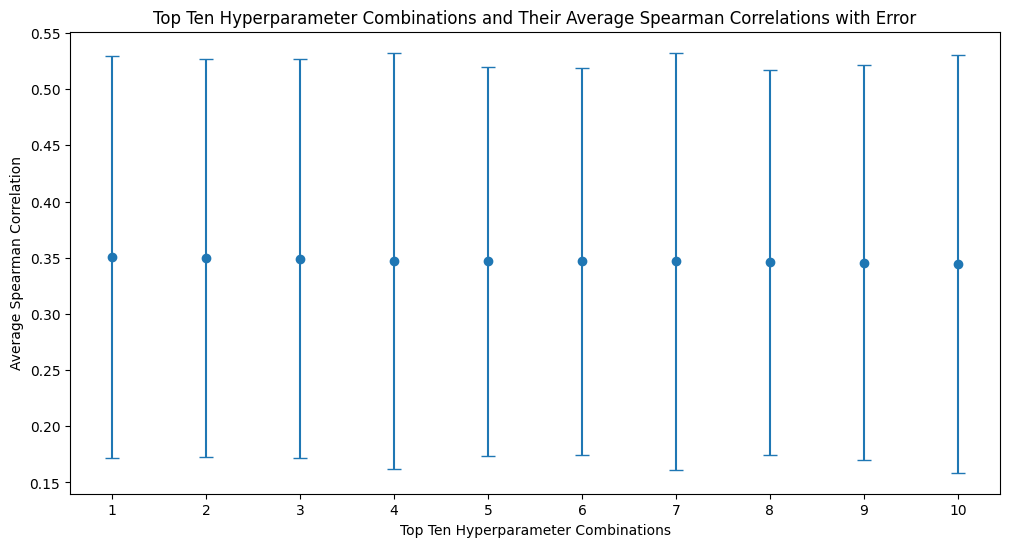

In [ ]:
import pandas as pd
from gensim.models import Word2Vec
from sklearn.model_selection import KFold
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
import torch


# Define the number of folds for cross-validation
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Define the hyperparameter grid to search over
hyperparameter_grid = {
    'vector_size': [50, 100, 150],
    'window': [3, 5, 7],
    'min_count': [1, 5, 10],
    'sg': [0, 1],
    'negative': [5, 10, 15],
    'epochs': [10, 20, 30],
    'sample': [1e-3, 1e-4, 1e-5]
}

# Initialize best_similarity and best_model
best_similarity = 0
best_model = None

# Lists to store results for visualization
results_list = []

# Iterate through the hyperparameter grid
for params in [
    {'vector_size': v, 'window': w, 'min_count': mc, 'sg': sg, 'negative': n, 'epochs': e, 'sample': s}
    for v in hyperparameter_grid['vector_size']
    for w in hyperparameter_grid['window']
    for mc in hyperparameter_grid['min_count']
    for sg in hyperparameter_grid['sg']
    for n in hyperparameter_grid['negative']
    for e in hyperparameter_grid['epochs']
    for s in hyperparameter_grid['sample']
]:
    fold_correlations = []

    for train_index, val_index in kf.split(validation_set):
        # Split the validation set into training and validation subsets for cross-validation
        val_set_fold = [validation_set[i] for i in val_index]
        gold_standard_fold = [gold_standard_scores[i] for i in val_index]

        # Train Word2Vec model on the training set
        model_w2v = Word2Vec(sentences=df.loc[train_index, 'plot_synopsis_tokens'].tolist(), workers=4, **params)

        # Calculate similarity scores on the validation subset
        similarity_scores = []
        for pair in val_set_fold:
            similarity = calculate_similarity(pair[0], pair[1], model_w2v)
            similarity_scores.append(similarity)

        # Evaluate performance (Spearman correlation)
        correlation, _ = spearmanr(similarity_scores, gold_standard_fold)
        fold_correlations.append(correlation)

    # Calculate the average correlation across folds
    avg_correlation = sum(fold_correlations) / num_folds

    # Calculate the standard deviation of correlations as the error
    error = torch.std(torch.tensor(fold_correlations))

    # Append results to the list
    results_list.append({
        'hyperparameters': params,
        'average_correlation': avg_correlation,
        'error': error
    })

    # Update best model if average correlation is higher
    if avg_correlation > best_similarity:
        best_similarity = avg_correlation
        best_model = model_w2v

# Print the best average correlation and corresponding hyperparameters
print(f"Best Average Spearman Correlation: {best_similarity}")
print(f"Best Hyperparameters: {best_model}")

# Sort the results_list by average correlation in descending order
results_list.sort(key=lambda x: x['average_correlation'], reverse=True)

# Select the top ten results
top_ten_results = results_list[:10]

# Print and visualize the top ten results
for i, result in enumerate(top_ten_results):
    print(f"Top {i + 1}: Hyperparameters: {result['hyperparameters']}, Average Correlation: {result['average_correlation']}, Error: {result['error']}")

# Visualize the top ten results
fig, ax = plt.subplots(figsize=(12, 6))
ax.errorbar(range(len(top_ten_results)), [result['average_correlation'] for result in top_ten_results],
            yerr=[result['error'] for result in top_ten_results], fmt='o', capsize=5)
ax.set_xticks(range(len(top_ten_results)))
ax.set_xticklabels([str(i + 1) for i in range(len(top_ten_results))])
ax.set_title("Top Ten Hyperparameter Combinations and Their Average Spearman Correlations with Error")
ax.set_xlabel("Top Ten Hyperparameter Combinations")
ax.set_ylabel("Average Spearman Correlation")
plt.show()

{'vector_size': 50, 'window': 3, 'min_count': 1, 'sg': 0, 'negative': 5, 'epochs': 10, 'sample': 0.001}
The following simalarity scores may need checking:
(absorb,learn) similarity score: 0.09984114021062851, gold ranking: 5.48
(absorb,withdraw) similarity score: 0.4293287992477417, gold ranking: 2.97
----------------------------
(acquire,get) similarity score: 0.20607127249240875, gold ranking: 8.82
(acquire,obtain) similarity score: 0.8173720240592957, gold ranking: 8.57
----------------------------
(acquire,get) similarity score: 0.20607127249240875, gold ranking: 8.82
(acquire,find) similarity score: 0.23610885441303253, gold ranking: 6.38
----------------------------
(apple,sauce) similarity score: 0.6111252903938293, gold ranking: 1.43
(apple,lemon) similarity score: 0.40578919649124146, gold ranking: 4.05
----------------------------
(apple,lemon) similarity score: 0.40578919649124146, gold ranking: 4.05
(apple,sunshine) similarity score: 0.478529155254364, gold ranking: 0.58
--

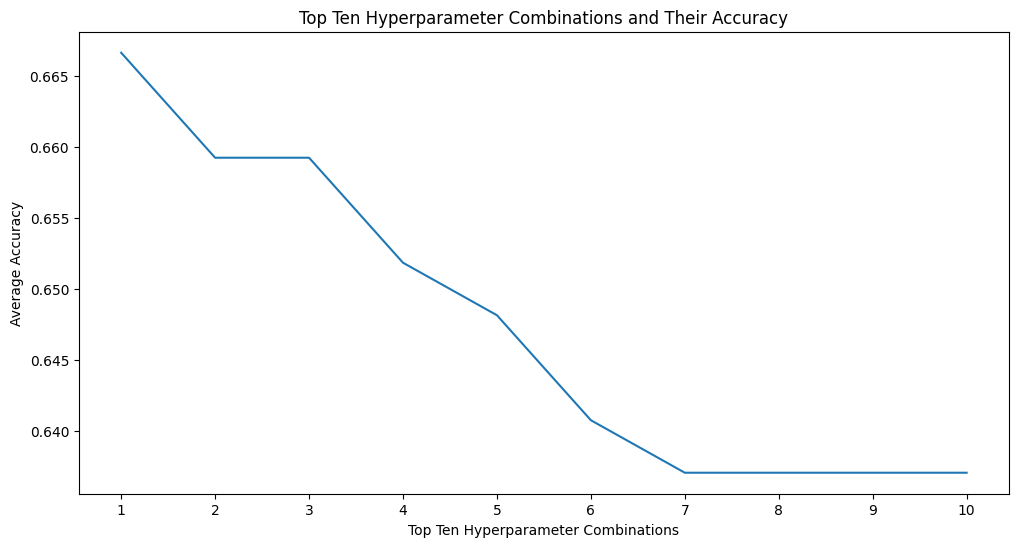

In [ ]:
import pandas as pd
from gensim.models import Word2Vec
import matplotlib.pyplot as plt

# Define the hyperparameter grid to search over
hyperparameter_grid = {
    'vector_size': [50, 100],
    'window': [3, 5],
    'min_count': [1, 5],
    'sg': [0, 1],
    'negative': [5, 10],
    'epochs': [10, 20],
    'sample': [1e-3, 1e-4]
}

# Initialize best_similarity and best_model
best_accuracy = 0
best_model = None

# Lists to store results for visualization
results_list = []

# Iterate through the hyperparameter grid
for params in [
    {'vector_size': v, 'window': w, 'min_count': mc, 'sg': sg, 'negative': n, 'epochs': e, 'sample': s}
    for v in hyperparameter_grid['vector_size']
    for w in hyperparameter_grid['window']
    for mc in hyperparameter_grid['min_count']
    for sg in hyperparameter_grid['sg']
    for n in hyperparameter_grid['negative']
    for e in hyperparameter_grid['epochs']
    for s in hyperparameter_grid['sample']
]:
    # Train Word2Vec model on the training set
    model_w2v = Word2Vec(sentences=df['plot_synopsis_tokens'], workers=4, **params)

    # Calculate similarity scores using the Word2Vec model
    similarity_scores = []
    for pair in validation_set:
        similarity = calculate_similarity(pair[0], pair[1], model_w2v)
        similarity_scores.append(similarity)

    # Create a new DataFrame for the validation results
    df_results = pd.DataFrame({
        'Word1': gold_standard_data.iloc[:, 1],
        'Word2': gold_standard_data.iloc[:, 2],
        'Model_Similarity_Score': similarity_scores
    })

    df_results.index = gold_standard_data.iloc[:, 0]

    print(params)

    # Save the new DataFrame to a CSV file without headers and with the index starting at 1
    df_results.to_csv("data/task1_validation_results.csv", header=False, columns=['Model_Similarity_Score'])

    # Calculate accuracy using validation script
    accuracy = calculate_accuracy("data/task1_validation_results.csv", "data/development-task1-nlp.csv")

    # Append results to the list
    results_list.append({
        'hyperparameters': params,
        'accuracy': accuracy
    })

    # Update best model if average correlation is higher
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model_w2v

# Print the best average correlation and corresponding hyperparameters
print(f"Best Accuracy: {best_accuracy}")
print(f"Best Hyperparameters: {best_model}")

# Sort the results_list by average correlation in descending order
results_list.sort(key=lambda x: x['accuracy'], reverse=True)

# Select the top ten results
top_ten_results = results_list[:10]

# Print and visualize the top ten results
for i, result in enumerate(top_ten_results):
    print(f"Top {i + 1}: Hyperparameters: {result['hyperparameters']}, Average Accuracy: {result['accuracy']}")

# Visualize the top ten results
fig, ax = plt.subplots(figsize=(12, 6))
ax.errorbar(range(len(top_ten_results)), [result['accuracy'] for result in top_ten_results])
ax.set_xticks(range(len(top_ten_results)))
ax.set_xticklabels([str(i + 1) for i in range(len(top_ten_results))])
ax.set_title("Top Ten Hyperparameter Combinations and Their Accuracy")
ax.set_xlabel("Top Ten Hyperparameter Combinations")
ax.set_ylabel("Average Accuracy")
plt.show()

### Some notes of the better accuracies

0.65185 accuracy - {'vector_size': 50, 'window': 3, 'min_count': 1, 'sg': 0, 'negative': 15, 'epochs': 20, 'sample': 0.0001}

0.65555 accuracy {'vector_size': 50, 'window': 3, 'min_count': 5, 'sg': 0, 'negative': 5, 'epochs': 10, 'sample': 0.0001}

Accuracy: 0.6592592592592592 {'vector_size': 50, 'window': 5, 'min_count': 5, 'sg': 0, 'negative': 10, 'epochs': 10, 'sample': 0.001}

## Step 4: Save best model
3 minutes to train

In [65]:
# Create a new Word2Vec instance using the best hyperparameters
final_model_w2v = Word2Vec(
    sentences=df['plot_synopsis_tokens'],
    vector_size=50,
    window=3,
    min_count=5,
    sg=0,
    negative=10,
    epochs=20,
    sample=0.0001,
    workers=4
)

## Step 5: Evaluation of development set
- Getting around 0.6-666 accuracy on the training set
- Most of the ones marked wrong seem to be either 1) OOV and no synonym found 2) difficult similarity score, and easy to get wrong e.g. apple and sauce, and apple and lemon

In [66]:
# Calculate similarity scores using the Word2Vec model
similarity_scores = []
for pair in validation_set:
    similarity = calculate_similarity(pair[0], pair[1], final_model_w2v)
    similarity_scores.append(similarity)

# Create a new DataFrame for the validation results
df_results = pd.DataFrame({
    'Word1': gold_standard_data.iloc[:, 1],
    'Word2': gold_standard_data.iloc[:, 2],
    'Model_Similarity_Score': similarity_scores
})

df_results.index = gold_standard_data.iloc[:, 0]

# Save the new DataFrame to a CSV file without headers and with the index starting at 1
df_results.to_csv("data/10606001-Task1-method-b-validation.csv", header=False, columns=['Model_Similarity_Score'])


In [67]:
df_results

,Word1,Word2,Model_Similarity_Score
0,,,
1,absorb,learn,0.087600
2,absorb,withdraw,0.018697
3,achieve,accomplish,0.701223
4,achieve,try,-0.039837
6,acquire,get,0.066283
...,...,...,...
177,car,cab,0.760138
178,bad,immoral,0.268380
179,bad,great,0.176807


In [69]:
!python task1_eval_script_student_version.py data/10606001-Task1-method-b-validation.csv data/Task-1-validation-dataset.csv


The following simalarity scores may need checking:
(acquire,get) similarity score: 0.06628298759460449, gold ranking: 8.82
(acquire,obtain) similarity score: 0.7192128300666809, gold ranking: 8.57
----------------------------
(acquire,get) similarity score: 0.06628298759460449, gold ranking: 8.82
(acquire,find) similarity score: 0.1777634471654892, gold ranking: 6.38
----------------------------
(apple,sauce) similarity score: 0.453128844499588, gold ranking: 1.43
(apple,lemon) similarity score: 0.33151504397392273, gold ranking: 4.05
----------------------------
(apple,lemon) similarity score: 0.33151504397392273, gold ranking: 4.05
(apple,sunshine) similarity score: 0.39804214239120483, gold ranking: 0.58
----------------------------
(arm,body) similarity score: 0.41025310754776, gold ranking: 4.05
(arm,knee) similarity score: 0.6612491011619568, gold ranking: 2.75
----------------------------
(arm,body) similarity score: 0.41025310754776, gold ranking: 4.05
(arm,neck) similarity sco

## Step 6: Test set

In [70]:
# Calculate similarity scores using the Word2Vec model
similarity_scores = []
for pair in test_set:
    similarity = calculate_similarity(pair[0], pair[1], final_model_w2v)
    similarity_scores.append(similarity)

# Create a new DataFrame for the validation results
df_results = pd.DataFrame({
    'Model_Similarity_Score': similarity_scores
})

df_results.index = test_gold_standard_data.iloc[:, 0]

# Save the new DataFrame to a CSV file without headers and with the index starting at 1
df_results.to_csv("data/10606001-Task1-method-b.csv", header=False, columns=['Model_Similarity_Score'])


# (C) ROBERTA using sentence transformers

In [56]:
!pip install -U sentence-transformers
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer('all-distilroberta-v1')

.gitattributes:   0%|          | 0.00/737 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.3k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/653 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

data_config.json:   0%|          | 0.00/15.7k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/329M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/333 [00:00<?, ?B/s]

train_script.py:   0%|          | 0.00/13.1k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [85]:
def calculate_similarity_score(word_set):
  similarity_scores = []

  for word1, word2 in word_set:
      # Tokenize multi-word terms
      tokens1 = word1.split()
      tokens2 = word2.split()

      # Compute embeddings for each token
      embeddings1 = model.encode(tokens1, convert_to_tensor=True)
      embeddings2 = model.encode(tokens2, convert_to_tensor=True)

      # Compute average embeddings for multi-word terms
      avg_embedding1 = embeddings1.mean(dim=0, keepdim=True)
      avg_embedding2 = embeddings2.mean(dim=0, keepdim=True)

      # Compute cosine-similarity for multi-word terms
      cosine_scores = util.cos_sim(avg_embedding1, avg_embedding2)

      similarity_scores.append(cosine_scores.item())

  return similarity_scores

## Test of development set

17 seconds

In [88]:
similarity_scores = calculate_similarity_score(validation_set)

In [89]:
# Create a new DataFrame for the validation results
df_results = pd.DataFrame({
    'Word1': gold_standard_data.iloc[:, 1],
    'Word2': gold_standard_data.iloc[:, 2],
    'Model_Similarity_Score': similarity_scores
})

df_results.index = gold_standard_data.iloc[:, 0]

# Save the new DataFrame to a CSV file without headers and with the index starting at 1
df_results.to_csv("data/10606001-Task1-method-c-validation.csv", header=False, columns=['Model_Similarity_Score'])

In [90]:
!python task1_eval_script_student_version.py data/10606001-Task1-method-c-validation-test.csv data/Task-1-validation-dataset.csv

The following simalarity scores may need checking:
(absorb,learn) similarity score: 0.15077432990074158, gold ranking: 5.48
(absorb,withdraw) similarity score: 0.3385798931121826, gold ranking: 2.97
----------------------------
(acquire,get) similarity score: 0.388755202293396, gold ranking: 8.82
(acquire,obtain) similarity score: 0.6445205211639404, gold ranking: 8.57
----------------------------
(apple,sauce) similarity score: 0.1688825637102127, gold ranking: 1.43
(apple,lemon) similarity score: 0.16117295622825623, gold ranking: 4.05
----------------------------
(apple,sauce) similarity score: 0.1688825637102127, gold ranking: 1.43
(apple,sunshine) similarity score: 0.2856880724430084, gold ranking: 0.58
----------------------------
(apple,lemon) similarity score: 0.16117295622825623, gold ranking: 4.05
(apple,sunshine) similarity score: 0.2856880724430084, gold ranking: 0.58
----------------------------
(arm,body) similarity score: 0.43930214643478394, gold ranking: 4.05
(arm,knee

## Test dataset


In [86]:
similarity_scores = calculate_similarity_score(test_set)

In [87]:
# Create a new DataFrame for the validation results
df_results = pd.DataFrame({
    'Model_Similarity_Score': similarity_scores
})

df_results.index = test_gold_standard_data.iloc[:, 0]

# Save the new DataFrame to a CSV file without headers and with the index starting at 1
df_results.to_csv("data/10606001-Task1-method-c.csv", header=False, columns=['Model_Similarity_Score'])